In [1]:
#start with a couple of basic imports
from __future__ import division, print_function  ## to handle integer division correctly
import numpy as np                               ## images are actually numpy arrays!

## magic to show matplotlib graphs in the ipython notebook
%matplotlib inline               
from matplotlib import pyplot as plt, cm         ## to view the images and color maps
import skimage

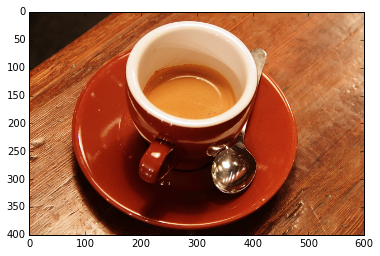

In [5]:
## there are several different reference files in scikit-image library including
from skimage import data

## Load the coffee image
coffee = data.coffee()
plt.imshow(coffee)

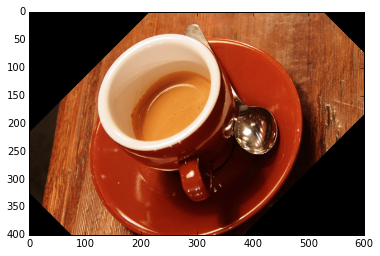

In [36]:
from skimage import transform
coffee_cpy = coffee.copy()
coffee_rotate = transform.rotate(coffee_cpy, 45)
plt.imshow(coffee_rotate)

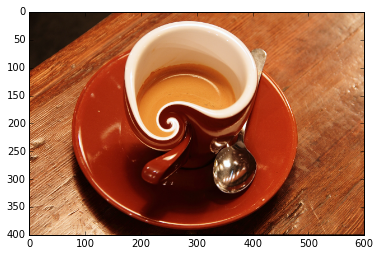

In [52]:
## Other Transforms
coffee_swirl = transform.swirl(coffee_cpy, center=(250,200), strength=8, radius=150)
plt.imshow(coffee_swirl)

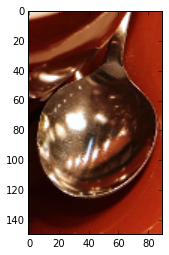

In [26]:
spoon = coffee[200:350,320:410,:]
plt.imshow(spoon)

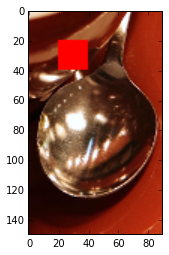

In [27]:
## since these are just numpy arrays their values can be manipulated easily
color_spoon = spoon.copy()
color_spoon[20:40, 20:40, :] = [255, 0, 0]  # [red, green, blue] = 
plt.imshow(color_spoon)

In [33]:
from skimage import measure
from skimage import color

spoon_gray = color.rgb2gray(spoon)

contours = measure.find_contours(spoon_gray,0.8)

[array([[  0.        ,  16.9313209 ],
        [  0.22962673,  16.        ],
        [  0.48440458,  15.        ],
        [  0.88422661,  14.        ],
        [  1.        ,  13.64187987],
        [  1.10088148,  13.        ],
        [  1.30831246,  12.        ],
        [  1.48708568,  11.        ],
        [  1.86407565,  10.        ],
        [  2.        ,   9.65782962],
        [  2.12370166,   9.        ],
        [  2.29032469,   8.        ],
        [  2.51075787,   7.        ],
        [  2.75051592,   6.        ],
        [  3.        ,   5.36065115],
        [  3.07603964,   5.        ],
        [  3.19534497,   4.        ],
        [  3.38601067,   3.        ],
        [  3.55259227,   2.        ],
        [  3.80887684,   1.        ],
        [  4.        ,   0.21161815],
        [  4.02357309,   0.        ]]), array([[  0.        ,  67.57933768],
        [  1.        ,  67.48470062],
        [  2.        ,  67.30547987],
        [  3.        ,  67.10426349],
        [  

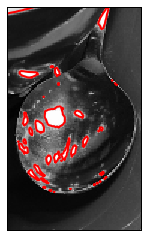

In [34]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(spoon_gray, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [93]:
from skimage import feature

template_matching = feature.match_template(coffee, spoon)

(511, 1)

In [68]:
from scipy.signal import argrelextrema

maximums = argrelextrema(scoreByPixel,np.greater,order=25)
maximums

(array([ 84, 203], dtype=int64), array([0, 0], dtype=int64))

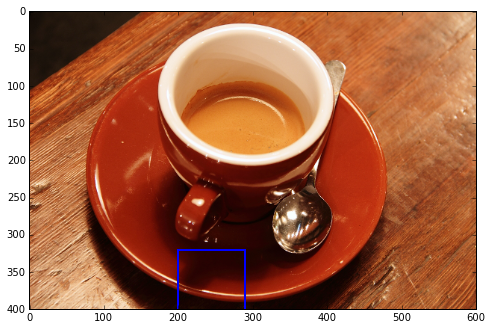

In [89]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
ax.imshow(coffee)
    
rect = mpatches.Rectangle((x,y), spoon.shape[1], spoon.shape[0],
                                      fill=False, edgecolor='blue', linewidth=2)
ax.add_patch(rect)

plt.show()

In [70]:
coffee.shape

(400, 600, 3)